In [ ]:
%matplotlib inline

import pandas
import numpy

import warnings
import itertools
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics as metrics

warnings.filterwarnings("ignore")


In [ ]:
# here we trained and tested the dataset

train = pandas.read_csv("./train.csv")
test = pandas.read_csv("./test.csv")



In [ ]:
print(train.head())  #some of the rows from the top

#to get the shape and size of the training dataset
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [ ]:
#for the test data

print(test.head())

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))


   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1   

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


normal     13449
anomaly    11743
Name: class, dtype: int64


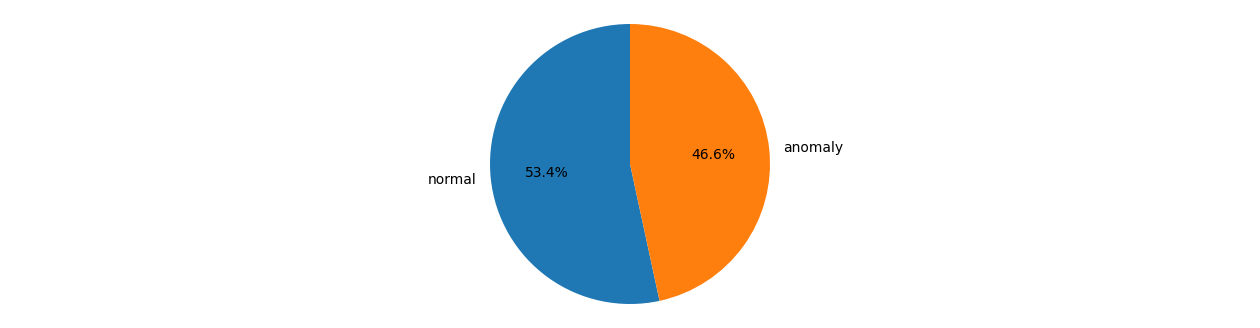

In [ ]:
# it mainly contains the class (normal and anomaly) and its frequency

ratio = train['class'].value_counts()
print(ratio)
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')

plt.show()



In [ ]:
# number of packet to be sent from the network

print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [ ]:
# as this feature is not needed for the detection so it can be dropped from the dataset

train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)


In [ ]:
#mainly used to reduce the mean to 0 and standard deviation to 1
#which helps in reducing overfitting makes sure that the features
#are on the same scale and improves performances

scaler = StandardScaler()

#selects the names of columns in the train DataFrame that have either float or integer data type.
cols = train.select_dtypes(include=['float64','int64']).columns

# to normalise the value
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))


# using the normalised dataframe it creates a new dataframe
sc_traindf = pandas.DataFrame(sc_train, columns = cols)
sc_testdf = pandas.DataFrame(sc_test, columns = cols)


In [ ]:
# labeling the unique value to each of the variables


encoder = LabelEncoder()

cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# The resulting encoded categorical data is then stored in separate dataframes enctrain and testcat.
# fit computes the parameter and transform the parameter to the data
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

#transformed data is stored in the variable enctrain and cat_train
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()


In [ ]:
#concatenate the continuous data (sc_traindf ) and discrete data (enc_traindf)
# needed to pass the categorical data into numerical form

train_x = pandas.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape


(25192, 40)

In [ ]:
# done for the testing data (normalised and labelled)

test_df = pandas.concat([sc_testdf,testcat],axis=1)
test_df.shape


(22544, 40)

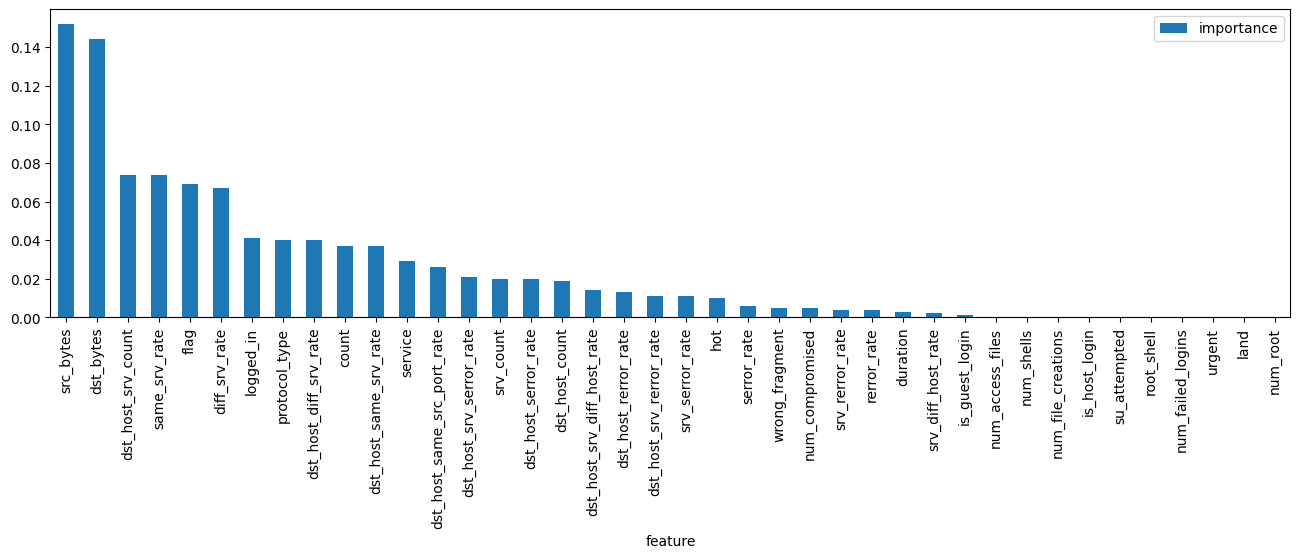

In [ ]:
# random forest cassifier is used because of assambling large amount of feature
# provide feature score which can be used for classification

rfc = RandomForestClassifier();

rfc.fit(train_x, train_y);

score = numpy.round(rfc.feature_importances_,3)
importances = pandas.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (16,4)
importances.plot.bar();


In [ ]:

rfc = RandomForestClassifier()


# rfe(recursive feature eliminator) class is created with rfe object
# only 10 feature are slected to deny the overfitting and increase the performances

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)


# get_support is used to create Boolean mask that indicates which features were selected
# zip_longest is used to map each feature in train_x and the boolean mask value
# selected feature is assigned to the seleted_feature and unselected are filtered out by the feature_map
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

print(selected_features)


['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'protocol_type', 'service', 'flag']


<Axes: >

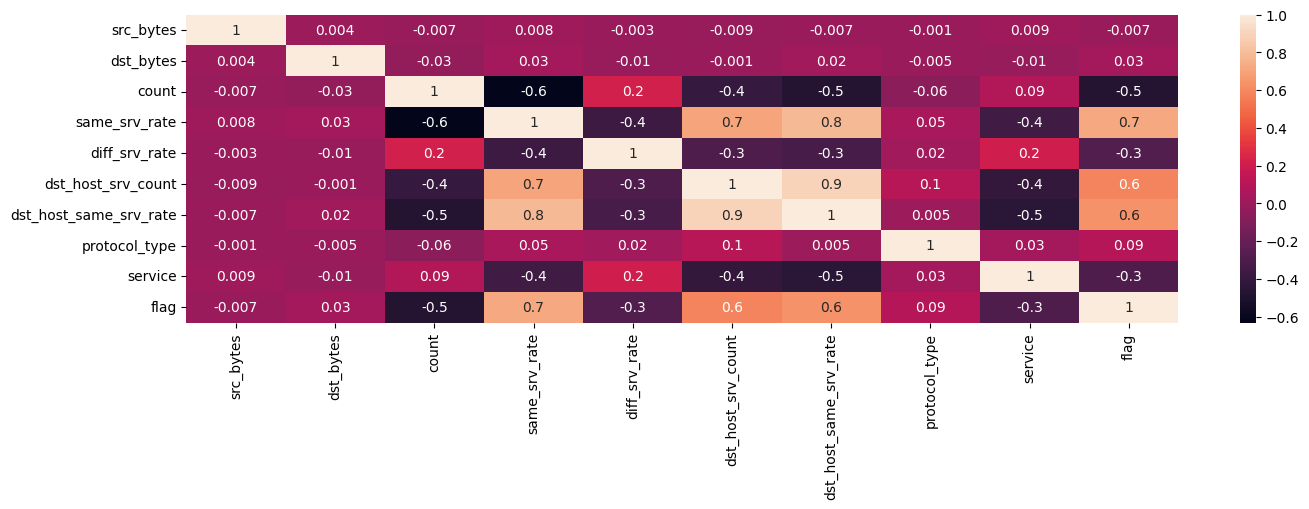

In [ ]:
# mainly used to identify the multicollinearity between the feature
# a heatmap using the seaborn library to visualize the correlation matrix between the selected features in train_x.
# annot specifies the value of the corelation coffiecient to be displayed in each cellof the heatmap
# fmt is used to specify the format of the annotation
# 1 specifies the perfect corelation  menas they are similar
seaborn.heatmap(train_x[selected_features].corr(), annot = True, fmt='.1g')


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.60, random_state=2)


In [ ]:
# used to fitt the model
# the algorithm will use all available processors or the cpu cores to perform the computations in parallel,will speed up the training process.
# fit is used to make prediction on new and unseen data

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, Y_train);



In [ ]:
# The function returns an array of k scores, one for each fold.
# The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives
#  classification report includes metrics such as precision, recall, and F1-score for each class.
scores = cross_val_score(model, X_train, Y_train, cv=10)
accuracy = metrics.accuracy_score(Y_train, model.predict(X_train))
confusion_matrix = metrics.confusion_matrix(Y_train, model.predict(X_train))
classification = metrics.classification_report(Y_train, model.predict(X_train))

print ("Cross Validation Mean Score:" "\n", scores.mean())
print ("Model Accuracy:" "\n", accuracy)
print ("Confusion matrix:" "\n", confusion_matrix)
print ("Classification report:" "\n", classification)



Cross Validation Mean Score:
 0.9910023145959611
Model Accuracy:
 0.9930532583526298
Confusion matrix:
 [[6984   70]
 [  35 8026]]
Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      7054
      normal       0.99      1.00      0.99      8061

    accuracy                           0.99     15115
   macro avg       0.99      0.99      0.99     15115
weighted avg       0.99      0.99      0.99     15115



In [ ]:
accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
classification = metrics.classification_report(Y_test, model.predict(X_test))

print ("Model Accuracy:" "\n", accuracy)
print ("Confusion matrix:" "\n", confusion_matrix)
print ("Classification report:" "\n", classification)



Model Accuracy:
 0.9904733551652277
Confusion matrix:
 [[4639   50]
 [  46 5342]]
Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      4689
      normal       0.99      0.99      0.99      5388

    accuracy                           0.99     10077
   macro avg       0.99      0.99      0.99     10077
weighted avg       0.99      0.99      0.99     10077



In [ ]:
# computes the accuracy of the model's predictions on the test data, which is the fraction of correctly predicted labels out of all labels
# metrics.confusion_matrix generates a confusion matrix which shows the count of actual labels versus predicted labels
prediction = model.predict(test_df)
test['prediction'] = prediction
print(test.head())



   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.